# Fractional Calculus

Define a vector space of continuous functions $F$ such that $f(0) = 0$. 

Define the linear operator $I: F\rightarrow F$ by

$$
(If)(x) := \int_0^x f(t)dt
$$

Continuous applications of this operator are denoted as $I^nf$.

## Cauchy formula

$$
I^n f(x) = \frac{1}{(n-1)!}\int_0^x (x-t)^{n-1}f(t)dt
$$

#### Proof

Let $F(x) := If(x)$ be the anti-derivative of $f$.

\begin{eqnarray}
\int_0^x (x-t)^n f(t)dt &=& \int_0^x (x-t)^n dF(t)\\
&=& F(t)(x-t)^n \bigg|_0^x + \int_0^x F(t) d(x-t)^n\\
&=& n\int_0^x F(t) (x-t)^{n-1}\\
&=& n(n-1)! I^n F(x)\\
&=& n! I^{n+1} f(x)
\end{eqnarray}


see also https://en.wikipedia.org/wiki/Cauchy_formula_for_repeated_integration

### Gamma Function

$$
\Gamma(z) := \int_0^\infty t^{z-1}e^{-t}dt
$$

#### Proposition
For any integer $n$, $\Gamma(n) = (n-1)!$

#### Proof
Induction. $\Gamma(1) = 1$.

\begin{eqnarray}
\Gamma(n) &=& \int_0^\infty t^{n-1}e^{-t}dt\\
&=& - \int_0^\infty t^{n-1}de^{-t}\\ 
&=&-e^{-t}t^{n-1}\bigg|_{0}^{\infty} + \int_0^\infty e^{-t}d t^{n-1}\\
&=& (n-1) \int_0^\infty t^{n-2}e^{-t}dt\\
&=& (n-1)\Gamma(n-1)
\end{eqnarray}


### Fractional Integral

Replace the factorial with the Gamma function in the Cauchy formula

$$
I^a f(x) = \frac{1}{\Gamma(a)}\int_0^x (x-t)^{a-1} f(t)dt  
$$

### Fractional Derivative

We want to preserve the rule $(D^a I^a)f = f$, so that $I^{-a} = D^a$.

Observe then that $D^a = D^{\lceil a \rceil + a - \lceil a \rceil} = D^{\lceil a \rceil}I^{\lceil a \rceil - a}$

Therefore

$$
D^a f(x) := \frac{1}{\Gamma(\lceil a \rceil - a)} D^{\lceil a \rceil} \int_0^x (x-t)^{\lceil a \rceil - a-1} f(t)dt
$$

For $0<a<1$

$$
D^a f(x) = \frac{1}{\Gamma(1-a)}\int_0^x (x-t)^{-a}f(t)dt
$$


See also https://en.wikipedia.org/wiki/Fractional_calculus

#### By Taylor expansion

$$
D^a = \sum_{n=0}^{\infty}\frac{\Gamma(a+1)}{n!\Gamma(n-a+1)}D^n
$$

In [20]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

def plot_polynomial(p, points=100):
    x = np.linspace(p.domain[0], p.domain[1], points)
    return plt.plot(x, p(x))

def plot_functions(functions, start, end, points=100):
    x = np.linspace(start, end, points)
    for f in functions:
        plt.plot(x, f(x), label=f)
    plt.xlabel('x')
    plt.ylabel('f(x)')



In [25]:
p = Polynomial.fromroots([-1.5,0,1], domain =[-2,2])

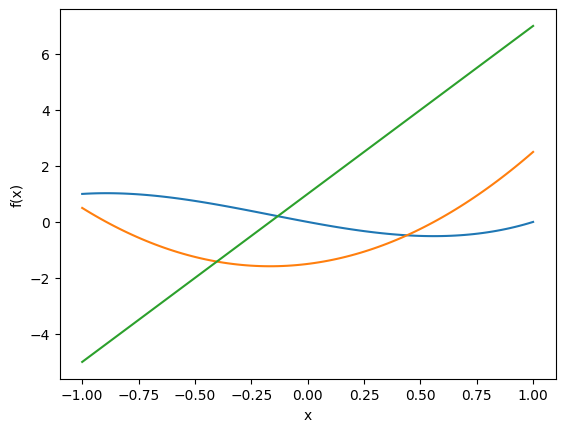

In [26]:
plot_functions([p, p.deriv(), p.deriv().deriv()], -1, 1)

In [41]:
p2 = p+0.5*p.deriv()

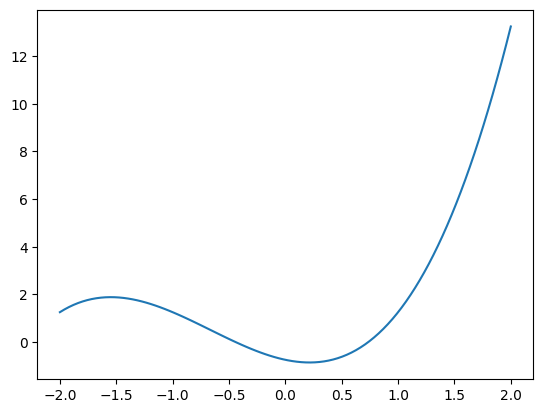

In [42]:
plot_polynomial(p2)

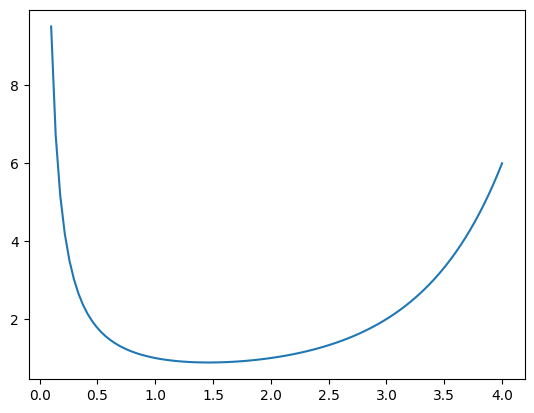

In [32]:
from scipy.special import gamma

x = np.linspace(0.1, 4, 100)
plt.plot(x, gamma(x))

In [49]:
def fractional_derivative(p, a):
    coeff = 1
    result = 0
    for n in range(1, p.degree()):
        f = p.deriv(n - 1)
        # Update the term for the current n
        coeff *= (a - (n - 1)) / n
        # Add the term to the result
        result += coeff * f
    return result

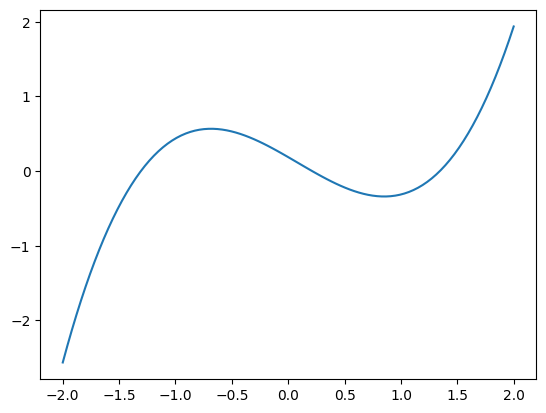

In [50]:
f = fractional_derivative(p, 0.5)
plot_polynomial(f)

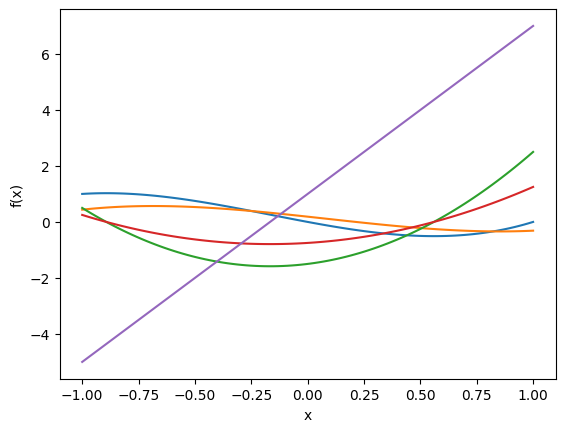

In [53]:
plot_functions([p, f, p.deriv(), fractional_derivative(p.deriv(), 0.5), p.deriv().deriv()], -1, 1)

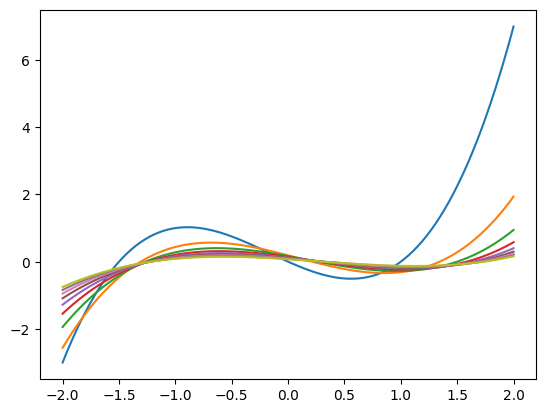

In [54]:
for x in range(1,10):
    deg = 1/x
    f = fractional_derivative(p,deg)
    plot_polynomial(f)
    
    